In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import random
import os

2025-06-13 13:47:26.690635: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749822446.927075      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749822446.994635      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
img_width = 128
img_height = 128
img_size = (128,128)
img_channels = 3

In [3]:
# Assuming you are in a Kaggle notebook and have added the 'dogs-vs-cats' dataset

import os
import pandas as pd

# This command will unzip the train.zip file into a directory named 'train'
# If this command fails, it means the source zip file is not found.
!unzip /kaggle/input/dogs-vs-cats/train.zip -d train

# Now, 'train' directory should exist and contain the unzipped images
Directory = os.listdir("./train/train")

labels = []
for name in Directory:
    label = name.split('.')[0]
    if label == 'cat':
        labels.append(0)
    else:
        labels.append(1)

df = pd.DataFrame({'filename': Directory, 'label': labels})

Archive:  /kaggle/input/dogs-vs-cats/train.zip
   creating: train/train/
  inflating: train/train/cat.0.jpg   
  inflating: train/train/cat.1.jpg   
  inflating: train/train/cat.10.jpg  
  inflating: train/train/cat.100.jpg  
  inflating: train/train/cat.1000.jpg  
  inflating: train/train/cat.10000.jpg  
  inflating: train/train/cat.10001.jpg  
  inflating: train/train/cat.10002.jpg  
  inflating: train/train/cat.10003.jpg  
  inflating: train/train/cat.10004.jpg  
  inflating: train/train/cat.10005.jpg  
  inflating: train/train/cat.10006.jpg  
  inflating: train/train/cat.10007.jpg  
  inflating: train/train/cat.10008.jpg  
  inflating: train/train/cat.10009.jpg  
  inflating: train/train/cat.1001.jpg  
  inflating: train/train/cat.10010.jpg  
  inflating: train/train/cat.10011.jpg  
  inflating: train/train/cat.10012.jpg  
  inflating: train/train/cat.10013.jpg  
  inflating: train/train/cat.10014.jpg  
  inflating: train/train/cat.10015.jpg  
  inflating: train/train/cat.10016.jpg

In [4]:
df.head()

,filename,label
0,cat.3791.jpg,0
1,cat.11254.jpg,0
2,cat.1416.jpg,0
3,cat.6222.jpg,0
4,dog.2069.jpg,1


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

In [6]:
model = Sequential()

model.add(Conv2D(64, (3, 3), activation= 'relu', input_shape= (128, 128, 3)))

model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation= 'softmax'))

model.compile(loss= 'categorical_crossentropy', optimizer= 'rmsprop', metrics= ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1749822473.062185      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1749822473.062878      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


* Input layer which represents input image data, which will reshape the image into a single dimensional array.
* convolutional layer, which will extract features from image
* pooling layer, which will reduce spatial volume of input image after convolution
* fully connected layer, which connects the network from a layer to another layer
* output layer, which will predict values.

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,962,242 (49.45 MB)

 Trainable params: 12,960,706 (49.44 MB)

 Non-trainable params: 1,536 (6.00 KB)

# Callbacks

callback is a set of functions to be applied at a given stage of the training procedure. This will include stopping training when you reach a certain accuracy/loss score, saving the model after each successful epoch, adjusting the learning rates, etc.

In [8]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [9]:
earlystop = EarlyStopping(patience= 10)

learning_rate_reduction = ReduceLROnPlateau(monitor= 'val_accuracy', patience= 2, verbose= 1, factor= 0.5, min_lr= 0.00001)

callbacks = [earlystop, learning_rate_reduction]

* Early Stop: To prevent overfitting, we will stop the learning after 10 epochs and the val_loss value will not decrease.
* Learning Rate Reduction : We will reduce the learning rate when accuracy does not increase for 2 steps.

In [10]:
df['label'] = df['label'].replace({0: 'cat', 1:'dog'})

train_data, validation_data = train_test_split(df, test_size= 0.2, random_state= 42)

print(train_data)
print(validation_data)

           filename label
23311  cat.5513.jpg   cat
23623  cat.8602.jpg   cat
1020   cat.6584.jpg   cat
12645  dog.3345.jpg   dog
1533   dog.1918.jpg   dog
...             ...   ...
21575  dog.7788.jpg   dog
5390   dog.4755.jpg   dog
860    dog.9370.jpg   dog
15795  cat.5937.jpg   cat
23654  cat.9156.jpg   cat

[20000 rows x 2 columns]
            filename label
6868    cat.7711.jpg   cat
24016   dog.7359.jpg   dog
9668    dog.8638.jpg   dog
13640   cat.2676.jpg   cat
14018   dog.7315.jpg   dog
...              ...   ...
8670    dog.7608.jpg   dog
11839   dog.6518.jpg   dog
4013    cat.8125.jpg   cat
21147  dog.10277.jpg   dog
695     cat.9308.jpg   cat

[5000 rows x 2 columns]


In [11]:
train_data = train_data.reset_index(drop= True)

train_data

,filename,label
0,cat.5513.jpg,cat
1,cat.8602.jpg,cat
2,cat.6584.jpg,cat
3,dog.3345.jpg,dog
4,dog.1918.jpg,dog
...,...,...
19995,dog.7788.jpg,dog
19996,dog.4755.jpg,dog
19997,dog.9370.jpg,dog
19998,cat.5937.jpg,cat


In [12]:
validation_data = validation_data.reset_index(drop= True)

validation_data

,filename,label
0,cat.7711.jpg,cat
1,dog.7359.jpg,dog
2,dog.8638.jpg,dog
3,cat.2676.jpg,cat
4,dog.7315.jpg,dog
...,...,...
4995,dog.7608.jpg,dog
4996,dog.6518.jpg,dog
4997,cat.8125.jpg,cat
4998,dog.10277.jpg,dog


In [13]:
final_train_data = train_data.shape[0]

final_train_data

20000

In [14]:
final_validation_data = validation_data.shape[0]
print(final_validation_data)
batch_size = 15

5000


In [15]:
generate_train_data = ImageDataGenerator(rotation_range= 15, rescale= 1./255, shear_range= 0.1, zoom_range= 0.2, horizontal_flip= True, width_shift_range= 0.1, height_shift_range= 0.1)

train_gen = generate_train_data.flow_from_dataframe(train_data, "./train/train/", x_col= 'filename', y_col= 'label', target_size= img_size, class_mode= 'categorical', batch_size= batch_size)

Found 20000 validated image filenames belonging to 2 classes.


In [16]:
generate_validation_data = ImageDataGenerator(rescale= 1./255)

validation_gen = generate_validation_data.flow_from_dataframe(validation_data, "./train/train/", x_col= 'filename', y_col= 'label', target_size= img_size, class_mode= 'categorical', batch_size= batch_size)

Found 5000 validated image filenames belonging to 2 classes.


In [17]:
epochs = 10
history = model.fit(train_gen, epochs= epochs, validation_data= validation_gen, validation_steps= final_validation_data // batch_size, steps_per_epoch= final_train_data // batch_size, callbacks= callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1749822480.020527      61 service.cc:148] XLA service 0x7dbc480077f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749822480.021673      61 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1749822480.021698      61 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1749822480.476524      61 cuda_dnn.cc:529] Loaded cuDNN version 90300


   3/1333 ━━━━━━━━━━━━━━━━━━━━ 1:11 53ms/step - accuracy: 0.4556 - loss: 1.8196  

I0000 00:00:1749822486.570509      61 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 121s 83ms/step - accuracy: 0.5868 - loss: 0.9628 - val_accuracy: 0.6697 - val_loss: 0.6038 - learning_rate: 0.0010
Epoch 2/10
   1/1333 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.5333 - loss: 0.7612

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1333/1333 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5333 - loss: 0.7612 - val_accuracy: 0.6300 - val_loss: 0.7276 - learning_rate: 0.0010
Epoch 3/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 101s 76ms/step - accuracy: 0.6910 - loss: 0.5931 - val_accuracy: 0.7347 - val_loss: 0.5312 - learning_rate: 0.0010
Epoch 4/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7333 - loss: 0.4564 - val_accuracy: 0.7325 - val_loss: 0.5387 - learning_rate: 0.0010
Epoch 5/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7340 - loss: 0.5437
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 103s 77ms/step - accuracy: 0.7340 - loss: 0.5437 - val_accuracy: 0.6505 - val_loss: 0.7497 - learning_rate: 0.0010
Epoch 6/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7333 - loss: 0.4021 - val_accuracy: 0.7031 - val_loss: 0.6031 - learning_rate: 5.0000e-04
Epoch 7/10
1333/1333 ━━━━━━━━━━━━━━━━━━━━ 103s 77ms/step - accuracy: 0.7843 -

In [18]:
model.save("model_dogsVScats_10epoch.h5")

# Testing the model

In [19]:
import os
import pandas as pd

!unzip /kaggle/input/dogs-vs-cats/test1.zip -d test1

test_filenames = os.listdir("./test1/test1")

test_data = pd.DataFrame({'filename': test_filenames})

nb_samples = test_data.shape[0]

Archive:  /kaggle/input/dogs-vs-cats/test1.zip
   creating: test1/test1/
  inflating: test1/test1/1.jpg       
  inflating: test1/test1/10.jpg      
  inflating: test1/test1/100.jpg     
  inflating: test1/test1/1000.jpg    
  inflating: test1/test1/10000.jpg   
  inflating: test1/test1/10001.jpg   
  inflating: test1/test1/10002.jpg   
  inflating: test1/test1/10003.jpg   
  inflating: test1/test1/10004.jpg   
  inflating: test1/test1/10005.jpg   
  inflating: test1/test1/10006.jpg   
  inflating: test1/test1/10007.jpg   
  inflating: test1/test1/10008.jpg   
  inflating: test1/test1/10009.jpg   
  inflating: test1/test1/1001.jpg    
  inflating: test1/test1/10010.jpg   
  inflating: test1/test1/10011.jpg   
  inflating: test1/test1/10012.jpg   
  inflating: test1/test1/10013.jpg   
  inflating: test1/test1/10014.jpg   
  inflating: test1/test1/10015.jpg   
  inflating: test1/test1/10016.jpg   
  inflating: test1/test1/10017.jpg   
  inflating: test1/test1/10018.jpg   
  inflating: te

In [20]:
generate_test_data = ImageDataGenerator(rescale= 1./255)

test_gen = generate_test_data.flow_from_dataframe(test_data, "./test1/test1/", x_col= 'filename', y_col= None, class_mode= None, target_size= img_size, batch_size= batch_size, shuffle= False)

Found 12500 validated image filenames.


In [21]:
prediction = model.predict(test_gen, steps= int(np.ceil(nb_samples/batch_size)))

834/834 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step


In [22]:
test_data['label'] = np.argmax(prediction, axis= -1)

label_map = dict((v, k) for k, v in train_gen.class_indices.items())

test_data['label'] = test_data['label'].replace(label_map)

test_data['label'] = test_data['label'].replace({'cat': 0, 'dog': 1})

/tmp/ipykernel_19/3196054740.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['label'] = test_data['label'].replace({'cat': 0, 'dog': 1})


In [23]:
testing = test_data.head(10)
print(testing.head())


   filename  label
0    49.jpg      1
1  5034.jpg      0
2  6047.jpg      0
3  7406.jpg      1
4    70.jpg      1


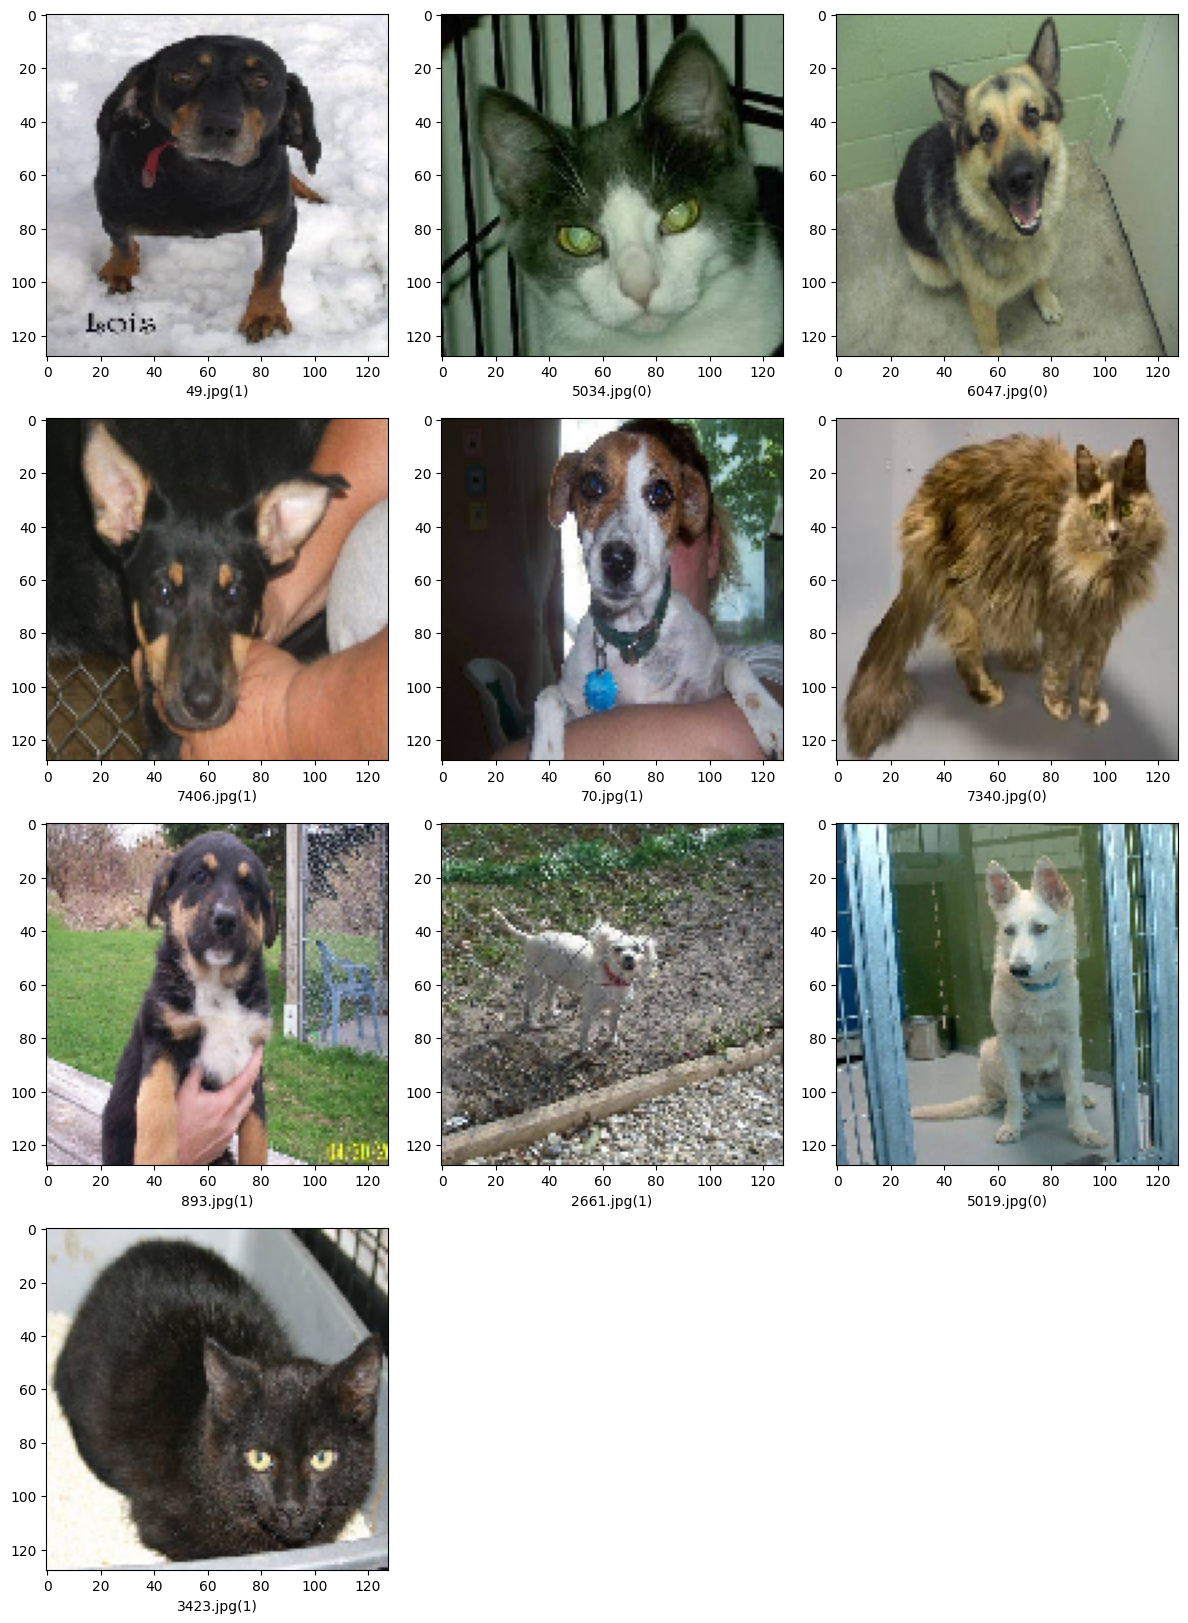

In [24]:
plt.figure(figsize= (12,24))

for index, row in testing.iterrows():
    filename = row['filename']
    label = row['label']
    image = load_img("./test1/test1/"+filename, target_size= img_size)

    plt.subplot(6, 3, index+1)
    plt.imshow(image)
    plt.xlabel(filename+'('+"{}".format(label)+')')
plt.tight_layout()
plt.show()

In [25]:
results = {0: 'cat', 1: 'dog'}

from PIL import Image
import numpy as np

im = Image.open("/kaggle/input/rotto-for-test/rotto.jpeg")
im = im.resize(img_size)
im = np.expand_dims(im, axis= 0)
im = np.array(im)
im = im/255

pred = model.predict([im])[0]

pred = np.argmax(pred)

print(pred, results[pred])

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=('Tensor(shape=(1, 128, 128, 3))',)
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step
1 dog


In [26]:
im2 = Image.open("/kaggle/input/big-rotto/Rottweiler-Dog.jpg")
im2 = im2.resize(img_size)
im2 = np.expand_dims(im2, axis= 0)
im2 = np.array(im2)
im2 = im2/255

pred = model.predict([im2])[0]

pred = np.argmax(pred)

print(pred, results[pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1 dog
